In [1]:
pip install cbsodata

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import cbsodata 
import matplotlib.pyplot as plt

# Downloading table list
toc = pd.DataFrame(cbsodata.get_table_list())

# Downloading entire dataset (can take up to 30s)
# data = pd.DataFrame(cbsodata.get_data('83765NED'))
# print(data.head())

# Downloading metadata
# metadata = pd.DataFrame(cbsodata.get_meta('83765NED', 'DataProperties'))
# print(metadata[['Key','Title']])

In [3]:
# Comment out: Use CTRL+/

# Import functions from libraries.
from collections import Counter

from pandas.api.types import is_numeric_dtype

from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics

from scipy.stats import pearsonr

# Import whole libraries. '%matplotlib inline' saves matplotlib graphs with notebook.
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sys
import math

# Set default figure size. This replaces 'plt.figure(figsize=(20,10))' in every cell.
plt.rcParams['figure.figsize'] = (20, 10)

# How to display all rows from data frame using pandas. Setting value to None to show all rows.
pd.set_option('display.max_rows', 20) 

In [4]:
#This is the sickleave numbers on NL level. Pls check https://opendata.cbs.nl/statline/?ts=1588842622385#/CBS/nl/dataset/80072ned/table
df = pd.DataFrame(cbsodata.get_data('80072NED'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5148 non-null   int64  
 1   BedrijfskenmerkenSBI2008   5148 non-null   object 
 2   Perioden                   5148 non-null   object 
 3   Ziekteverzuimpercentage_1  4838 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 161.0+ KB


In [6]:
#We create now a slice of the dataframe only containing sickleave on national level.
df_nl = df.loc[(df['BedrijfskenmerkenSBI2008'] == "A-U Alle economische activiteiten"),:]

In [7]:
df_nl

,ID,BedrijfskenmerkenSBI2008,Perioden,Ziekteverzuimpercentage_1
0,0,A-U Alle economische activiteiten,1996 1e kwartaal,5.5
1,1,A-U Alle economische activiteiten,1996 2e kwartaal,4.6
2,2,A-U Alle economische activiteiten,1996 3e kwartaal,4.0
3,3,A-U Alle economische activiteiten,1996 4e kwartaal,4.7
4,4,A-U Alle economische activiteiten,1996,4.7
...,...,...,...,...
127,127,A-U Alle economische activiteiten,2021 3e kwartaal,4.6
128,128,A-U Alle economische activiteiten,2021 4e kwartaal,5.4
129,129,A-U Alle economische activiteiten,2021,4.9
130,130,A-U Alle economische activiteiten,2022 1e kwartaal,6.3


In [8]:
#We create now a dataframe only containing quarterly numbers
df_nl_q = df_nl.loc[(df_nl['Perioden'].str.contains('kwartaal')),:]

In [9]:
from datetime import date

# load dates of sickleave periode 
dates = pd.read_csv(r'sickleave_date.csv', sep=';', 
        index_col='Perioden', 
                   parse_dates=True)

In [10]:
dates = dates[['Dates']]
dates['Dates'] = pd.to_datetime(dates['Dates'])
dates

,Dates
Perioden,
1996 1e kwartaal,1996-01-01
1996 2e kwartaal,1996-01-04
1996 3e kwartaal,1996-01-07
1996 4e kwartaal,1996-01-10
1997 1e kwartaal,1997-01-01
...,...
2021 2e kwartaal,2021-01-04
2021 3e kwartaal,2021-01-07
2021 4e kwartaal,2021-01-10


In [11]:
df_nl_q = df_nl_q.merge(dates, on='Perioden')

In [12]:
df_nl_q

,ID,BedrijfskenmerkenSBI2008,Perioden,Ziekteverzuimpercentage_1,Dates
0,0,A-U Alle economische activiteiten,1996 1e kwartaal,5.5,1996-01-01
1,1,A-U Alle economische activiteiten,1996 2e kwartaal,4.6,1996-01-04
2,2,A-U Alle economische activiteiten,1996 3e kwartaal,4.0,1996-01-07
3,3,A-U Alle economische activiteiten,1996 4e kwartaal,4.7,1996-01-10
4,5,A-U Alle economische activiteiten,1997 1e kwartaal,4.9,1997-01-01
...,...,...,...,...,...
101,126,A-U Alle economische activiteiten,2021 2e kwartaal,4.7,2021-01-04
102,127,A-U Alle economische activiteiten,2021 3e kwartaal,4.6,2021-01-07
103,128,A-U Alle economische activiteiten,2021 4e kwartaal,5.4,2021-01-10
104,130,A-U Alle economische activiteiten,2022 1e kwartaal,6.3,2022-01-01


In [13]:
sl = df_nl_q.set_index('Dates')

In [14]:
sl = sl[['Ziekteverzuimpercentage_1']]
sl

,Ziekteverzuimpercentage_1
Dates,
1996-01-01,5.5
1996-01-04,4.6
1996-01-07,4.0
1996-01-10,4.7
1997-01-01,4.9
...,...
2021-01-04,4.7
2021-01-07,4.6
2021-01-10,5.4


In [15]:
!pip install pmdarima==2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 48.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


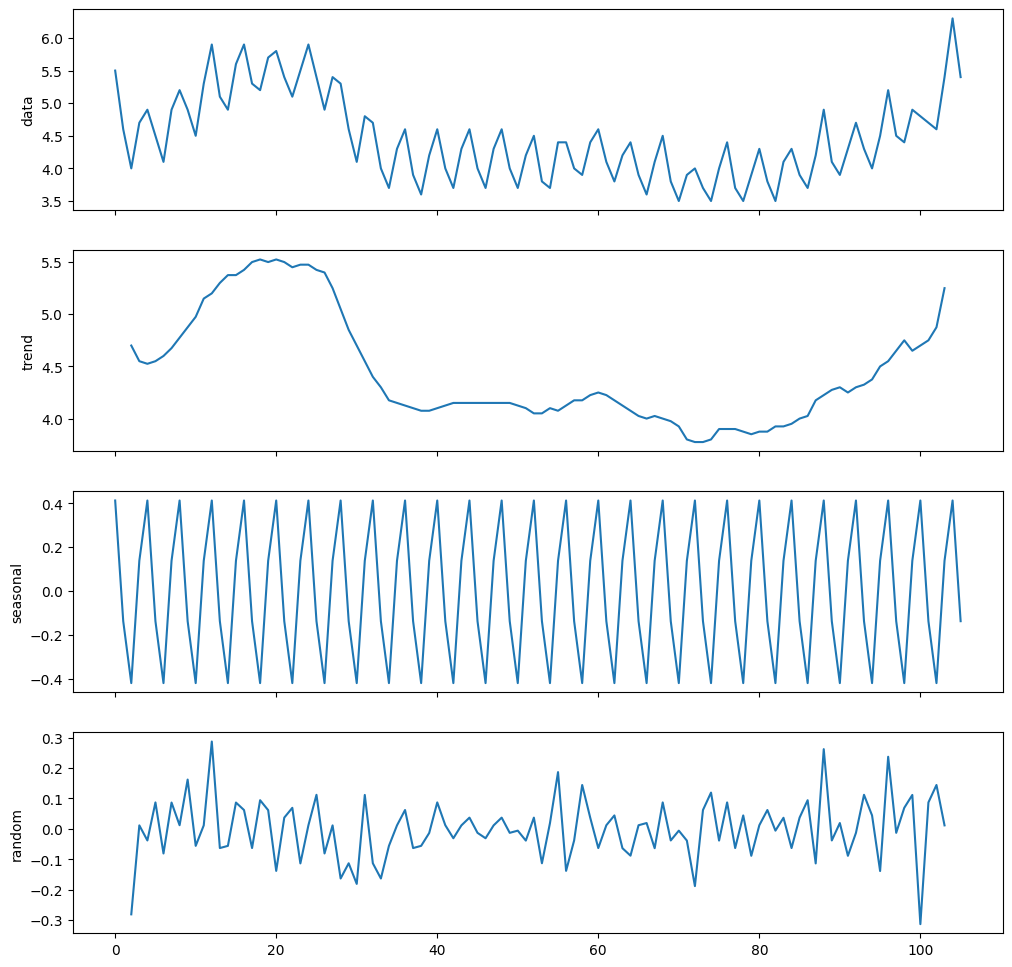

In [16]:

from pmdarima import arima, utils

# note pmdarima expects nd.array as input
arima_decomp = arima.decompose(sl.Ziekteverzuimpercentage_1.values, type_='additive', m=4) 
utils.decomposed_plot(arima_decomp, figure_kwargs={'figsize': (12,12)})

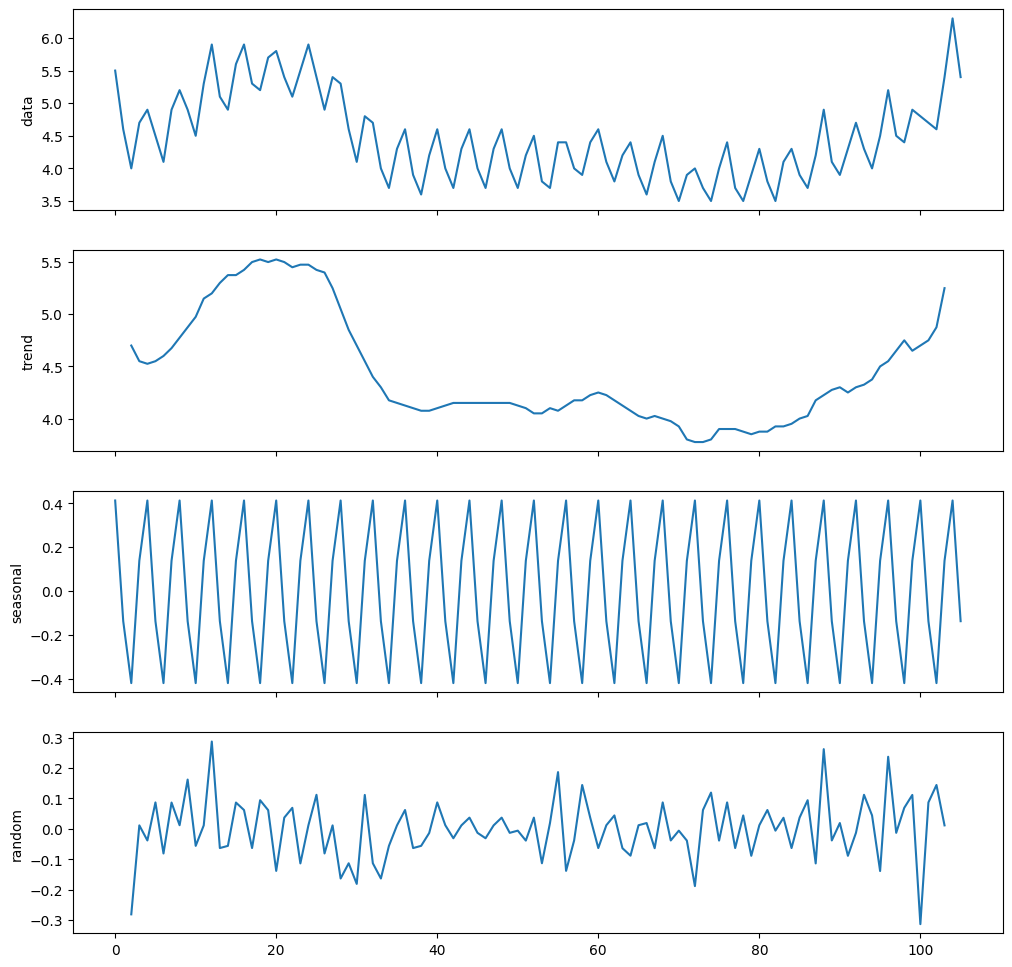

In [17]:
# note pmdarima expects nd.array as input
arima_decomp = arima.decompose(df_nl_q.Ziekteverzuimpercentage_1.values, type_='additive', m=4) 
utils.decomposed_plot(arima_decomp, figure_kwargs={'figsize': (12,12)})

In [18]:
sl_trend = pd.DataFrame(arima_decomp.trend, columns=['SLtrend'] ,  index=sl.index)
                # columns=['Perioden','SickleaveTrend'],
                
                 

In [19]:
sl_trend

,SLtrend
Dates,
1996-01-01,NaN
1996-01-04,NaN
1996-01-07,4.700
1996-01-10,4.550
1997-01-01,4.525
...,...
2021-01-04,4.750
2021-01-07,4.875
2021-01-10,5.250


In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to sickleave dataset
stepwise_fit = auto_arima(sl.Ziekteverzuimpercentage_1.values, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 4,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=-42.230, Time=1.42 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=62.788, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-27.556, Time=0.70 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=12.800, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=61.576, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=1.272, Time=0.33 sec
 ARIMA(1,0,1)(1,1,1)[4] intercept   : AIC=-41.999, Time=2.37 sec
 ARIMA(1,0,1)(0,1,2)[4] intercept   : AIC=-41.647, Time=3.92 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=-28.015, Time=1.02 sec
 ARIMA(1,0,1)(1,1,2)[4] intercept   : AIC=-41.012, Time=2.46 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,0,1)(0,1,1)[4] intercept   : AIC=-40.410, Time=1.70 sec
 ARIMA(1,0,2)(0,1,1)[4] intercept   : AIC=-41.833, Time=3.31 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=61.798, Time=0.50 sec
 ARIMA(0,0,2)(0,1,1)[4] intercept   : AIC=4.241, Time=1.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  106
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 4)   Log Likelihood                  26.032
Date:                           Fri, 04 Nov 2022   AIC                            -44.063
Time:                                   12:42:33   BIC                            -33.564
Sample:                                        0   HQIC                           -39.812
                                           - 106                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9788      0.044     22.159      0.000       0.892       1.065
ma.L1         -0.1482      0.094     -1.581      0.114      -0.332       0.036
ma.S.L4       -0.8776      0.090     -9.704      0.000      -1.055      -0.700
sigma2         0.0333      0.004      7.759      0.000       0.025       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 6.67
Prob(Q):                              0.60   Prob(JB):                         0.04
Heteroskedasticity (H):               1.33   Skew:                             0.31
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(sl.Ziekteverzuimpercentage_1.values, 
                order = (1, 0, 1), 
                seasonal_order =(0, 1, 1, 4))
  
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.06929D-02    |proj g|=  3.43895D-01

At iterate    5    f= -2.21039D-01    |proj g|=  1.47331D-01
 This problem is unconstrained.

At iterate   10    f= -2.35857D-01    |proj g|=  8.98821D-02

At iterate   15    f= -2.42964D-01    |proj g|=  9.10875D-02

At iterate   20    f= -2.45422D-01    |proj g|=  1.55440D-02

At iterate   25    f= -2.45582D-01    |proj g|=  1.37054D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  106
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 4)   Log Likelihood                  26.032
Date:                           Fri, 04 Nov 2022   AIC                            -44.063
Time:                                   12:42:34   BIC                            -33.564
Sample:                                        0   HQIC                           -39.812
                                           - 106                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9788      0.044     22.159      0.000       0.892       1.065
ma.L1         -0.1482      0.094     -1.581      0.114      -0.332       0.036
ma.S.L4       -0.8776      0.090     -9.704      0.000      -1.055      -0.700
sigma2         0.0333      0.004      7.759      0.000       0.025       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 6.67
Prob(Q):                              0.60   Prob(JB):                         0.04
Heteroskedasticity (H):               1.33   Skew:                             0.31
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
import matplotlib.pyplot as plt


In [23]:
train = sl.Ziekteverzuimpercentage_1.iloc[:len(sl.Ziekteverzuimpercentage_1)-4]
test = sl.Ziekteverzuimpercentage_1.iloc[len(sl.Ziekteverzuimpercentage_1)-4:]

In [24]:
train

Dates
1996-01-01    5.5
1996-01-04    4.6
1996-01-07    4.0
1996-01-10    4.7
1997-01-01    4.9
             ... 
2020-01-04    4.5
2020-01-07    4.4
2020-01-10    4.9
2021-01-01    4.8
2021-01-04    4.7
Name: Ziekteverzuimpercentage_1, Length: 102, dtype: float64

In [25]:
test

Dates
2021-01-07    4.6
2021-01-10    5.4
2022-01-01    6.3
2022-01-04    5.4
Name: Ziekteverzuimpercentage_1, dtype: float64

In [26]:
start = len(train)
end = len(train) + len(test) - 1
predictions  = result.predict(start, end, typ = 'levels')
predictions

array([4.38812901, 5.06267112, 5.64060949, 5.65702365])

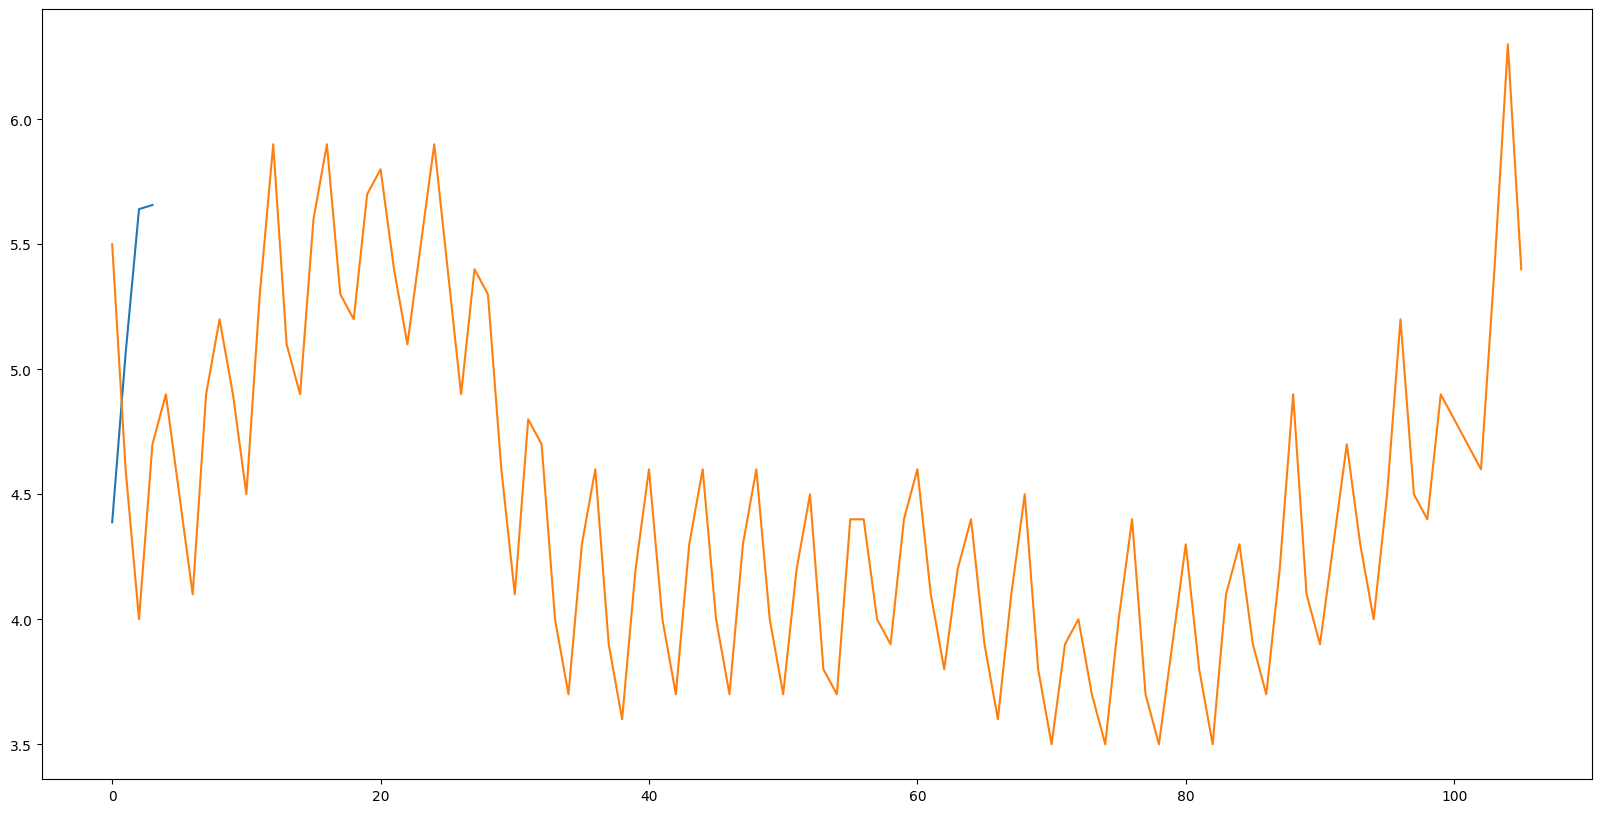

In [27]:
predictions = result.predict(start, end, typ = 'levels')
predictions
# plot predictions and actual values
plt.plot(predictions)

plt.plot(df_nl_q.Ziekteverzuimpercentage_1.values)
plt.show()

In [28]:
#Evaluate the model

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test, predictions)

0.40605944531290555

In [29]:
# Calculate mean squared error
mean_squared_error(test, predictions)

0.16488427312782455

In [30]:
sickleave = df_nl_q.Ziekteverzuimpercentage_1
#Forecast with ARIMA
# Train the model on the full dataset
model = model = SARIMAX(sickleave.values, 
                        #order = (1, 0, 1), 
                        #seasonal_order =(0, 1, 1, 4))
                        order = (1, 0, 1), 
                        seasonal_order =(0, 1, 1, 4))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(sickleave), 
                          end = (len(sickleave)-1) + 3 * 4, 
                          typ = 'levels')
  


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.06929D-02    |proj g|=  3.43895D-01
 This problem is unconstrained.

At iterate    5    f= -2.21039D-01    |proj g|=  1.47331D-01

At iterate   10    f= -2.35857D-01    |proj g|=  8.98821D-02

At iterate   15    f= -2.42964D-01    |proj g|=  9.10875D-02

At iterate   20    f= -2.45422D-01    |proj g|=  1.55440D-02

At iterate   25    f= -2.45582D-01    |proj g|=  1.37054D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4    

In [31]:
# prediction_series = pd.Series(predictions,index=test.index)
# fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.plot(train.Ziekteverzuimpercentage_1)
# ax.plot(prediction_series)


In [32]:
#Try another example

import pmdarima as pm
from pmdarima.model_selection import train_test_split
# import numpy as np
# import matplotlib.pyplot as plt

# Load/split your data
y = sl.Ziekteverzuimpercentage_1
train, test = train_test_split(y, train_size=100)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=4)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future



In [33]:
len(forecasts)

6

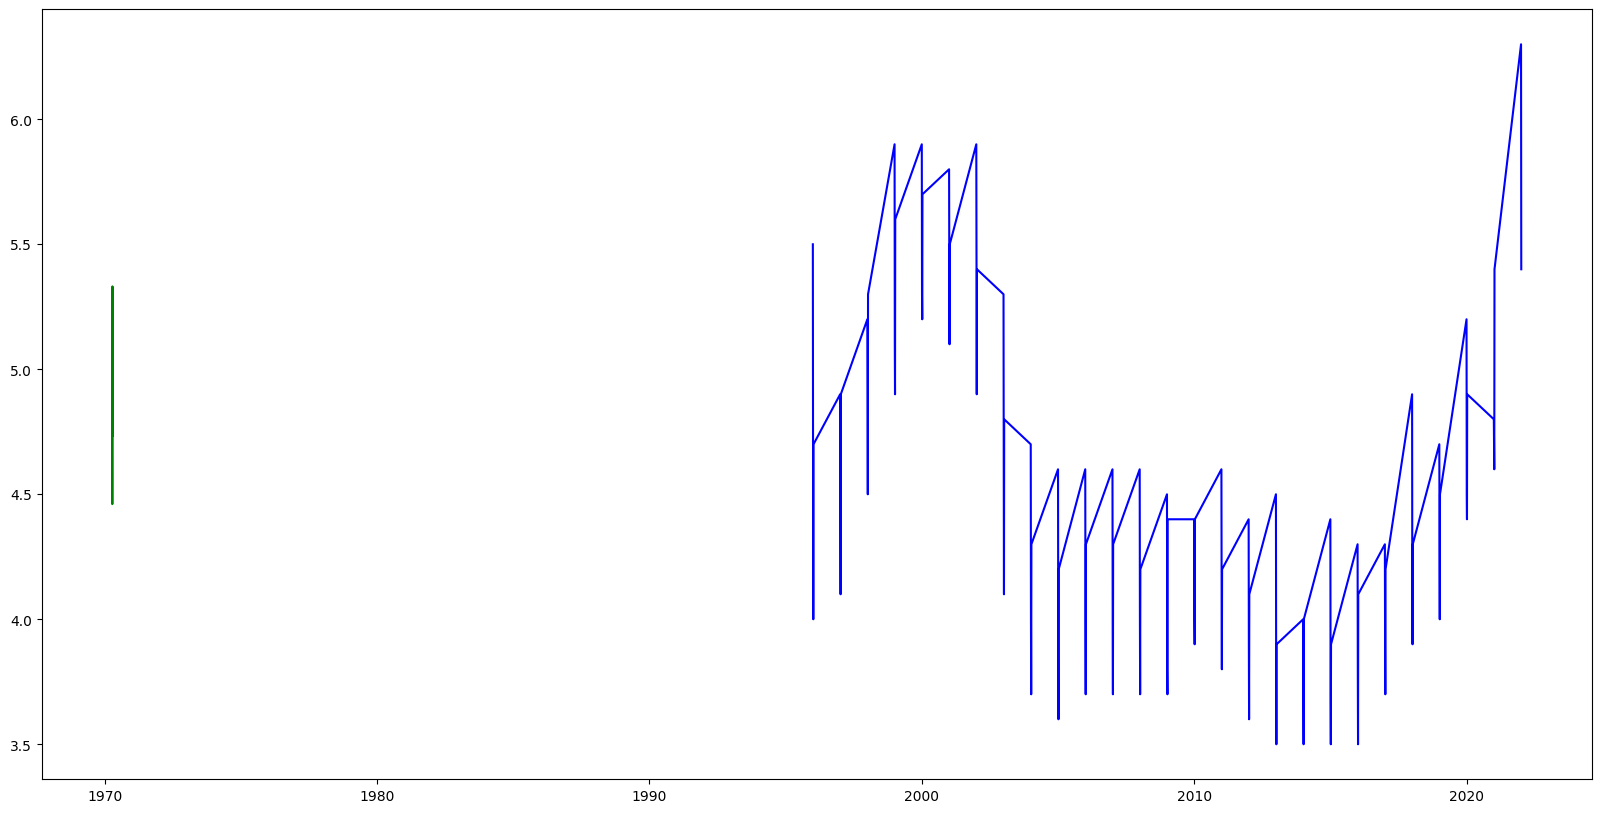

In [34]:
plt.plot( y, c='blue')
plt.plot(forecasts, c='green')
#plt.plot(sickleave, c='red')
plt.show()

In [35]:
# load combined data 
df_1 = pd.read_csv(r'1st_dataset_zv_edu_comp_pct.csv', sep=';', decimal=",",
        index_col='Perioden', 
                   parse_dates=True)

In [36]:
df1_trend = df_1.join(sl_trend, how='left')

In [37]:


# df1_trend['SLtrend'] = df1_trend['0']
df1_trend

,Ziekteverzuimpercentage_1,LO_ratio,MO_ratio,HO_ratio,Weetniet_ratio,Jobs_healthcare_ratio,Jobs_trade_ratio,Jobs_rental_ratio,Jobs_industry_ratio,Jobs_edu_ratio,Jobs_gov_ratio,Jobs_specialbusiness_ratio,Jobs_construction_ratio,SizeUnder100_ratio,Size100to500_ratio,SizeAbove500_ratio,SLtrend
Perioden,,,,,,,,,,,,,,,,,
1996-01-01,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-07,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700
1996-01-10,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.550
1997-01-01,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,4.7,19.0,39.2,41.2,0.6,17.3,16.8,11.8,9.0,6.6,6.5,6.3,4.0,99.6,0.3,0.1,4.750
2021-01-07,4.6,18.8,39.1,41.6,0.6,17.1,16.7,11.9,8.9,6.6,6.5,6.3,4.0,99.6,0.3,0.1,4.875
2021-01-10,5.4,18.7,38.6,42.2,0.6,17.0,16.6,11.9,8.9,6.6,6.4,6.4,4.0,99.6,0.3,0.1,5.250


In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 1996-01-01 to 2022-01-04
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ziekteverzuimpercentage_1   106 non-null    float64
 1   LO_ratio                    38 non-null     float64
 2   MO_ratio                    38 non-null     float64
 3   HO_ratio                    38 non-null     float64
 4   Weetniet_ratio              38 non-null     float64
 5   Jobs_healthcare_ratio       66 non-null     float64
 6   Jobs_trade_ratio            66 non-null     float64
 7   Jobs_rental_ratio           66 non-null     float64
 8   Jobs_industry_ratio         66 non-null     float64
 9   Jobs_edu_ratio              66 non-null     float64
 10  Jobs_gov_ratio              66 non-null     float64
 11  Jobs_specialbusiness_ratio  66 non-null     float64
 12  Jobs_construction_ratio     66 non-null     float64
 13  SizeUnder100_rat

In [39]:

df1_returns = df1_trend.diff()

In [40]:
df1_returns = df1_returns.dropna()
df1_returns

,Ziekteverzuimpercentage_1,LO_ratio,MO_ratio,HO_ratio,Weetniet_ratio,Jobs_healthcare_ratio,Jobs_trade_ratio,Jobs_rental_ratio,Jobs_industry_ratio,Jobs_edu_ratio,Jobs_gov_ratio,Jobs_specialbusiness_ratio,Jobs_construction_ratio,SizeUnder100_ratio,Size100to500_ratio,SizeAbove500_ratio,SLtrend
Perioden,,,,,,,,,,,,,,,,,
2013-01-04,-0.7,-0.5,0.1,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.1,0.0,-0.1,0.0,0.0,0.0,-0.025
2013-01-07,-0.3,-0.1,0.0,0.2,-0.1,-0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.050
2013-01-10,0.4,-0.2,-0.2,0.3,0.1,-0.1,0.0,0.1,0.0,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,-0.125
2014-01-01,0.1,0.1,-0.2,0.5,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.1,-0.1,0.0,0.0,0.0,-0.025
2014-01-04,-0.3,0.1,0.1,0.2,-0.3,-0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-10,0.5,-0.2,-0.5,0.9,-0.2,0.1,0.1,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,-0.100
2021-01-01,-0.1,0.6,-0.2,0.2,-0.6,0.1,-0.1,0.1,0.0,0.1,0.0,-0.1,0.0,0.0,0.0,0.0,0.050
2021-01-04,-0.1,-0.1,-0.2,0.4,-0.1,-0.1,-0.1,0.3,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050


In [41]:
# Compute correlation using corr()
correlation = df1_returns.corr()
# print("Correlation of sickleave trend and jobs edu ratio: ", correlation)

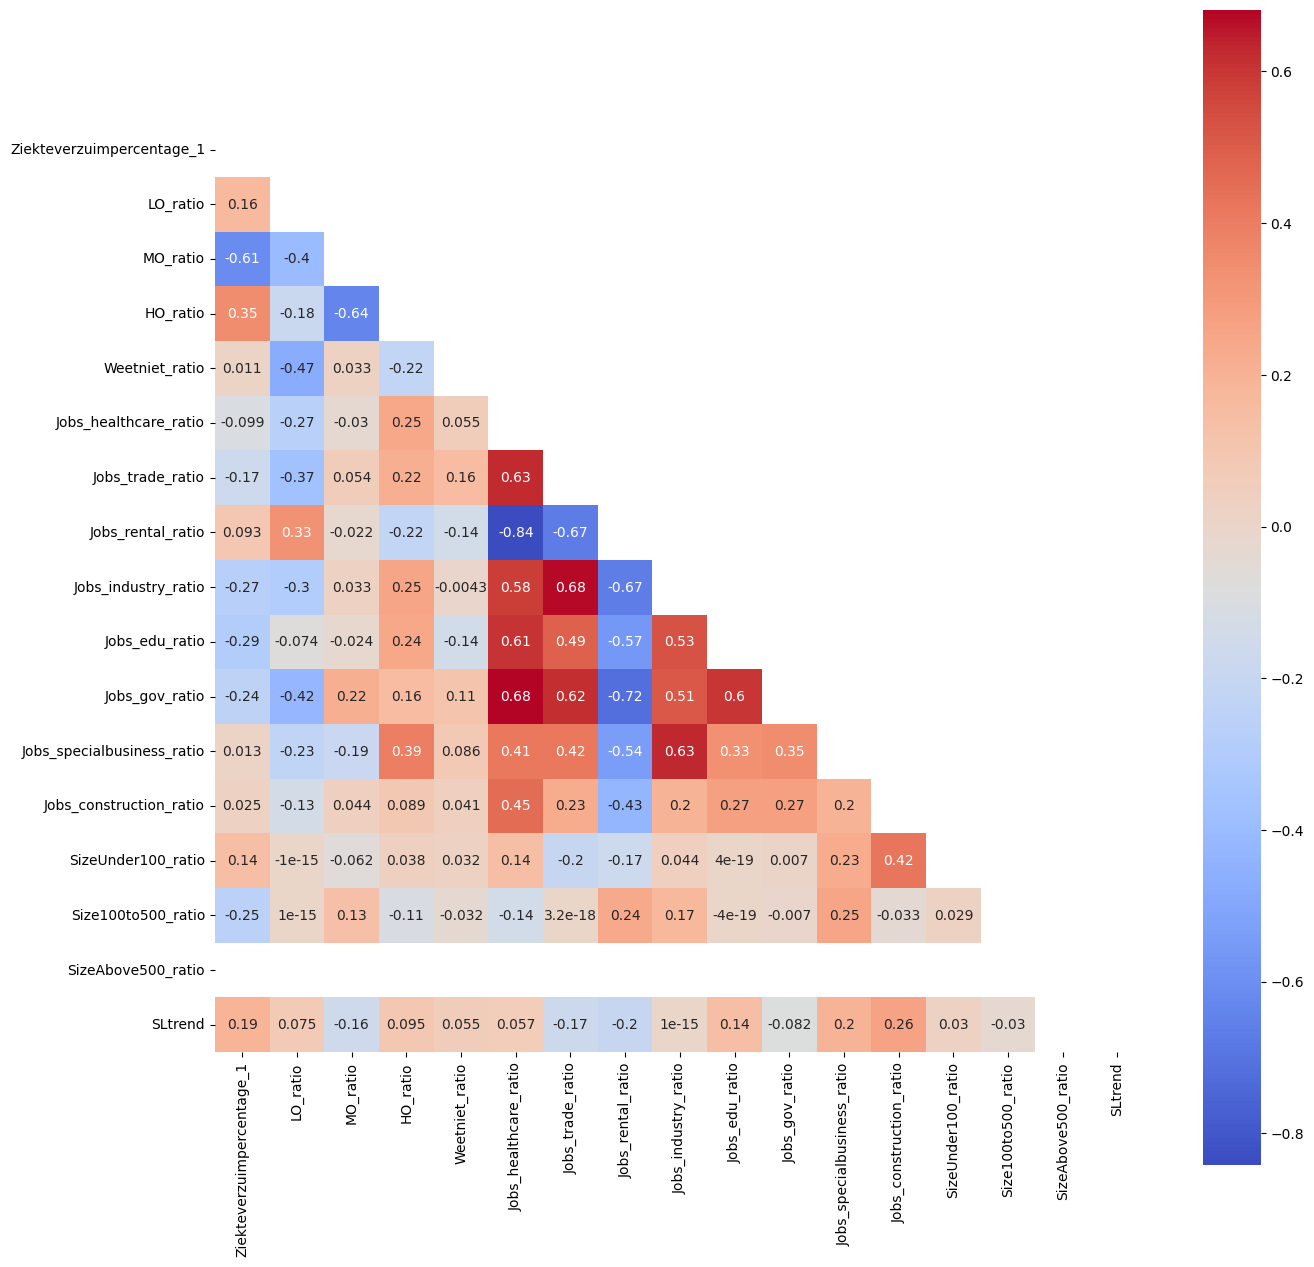

In [74]:
plt.rcParams['figure.figsize'] = (15, 15)

matrix = np.triu(correlation)

sns.heatmap(correlation, square=True, cmap='coolwarm', mask=matrix, annot=True);

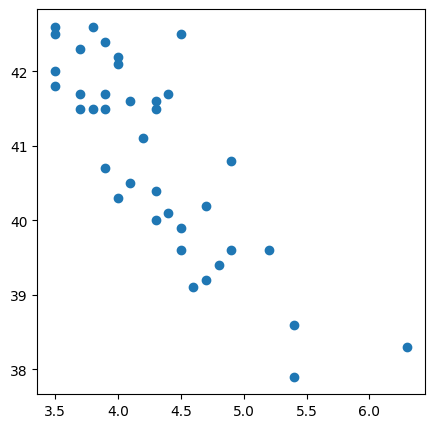

In [75]:
plt.rcParams['figure.figsize'] = (5, 5)
# Make scatter plot
plt.scatter(df_1['Ziekteverzuimpercentage_1'], df_1['MO_ratio'])
# plt.scatter(df_1['Ziekteverzuimpercentage_1'], df_1['Jobs_healthcare_ratio'])
# plt.scatter(df_1['Ziekteverzuimpercentage_1'], df_1['Jobs_rental_ratio'])
plt.show()


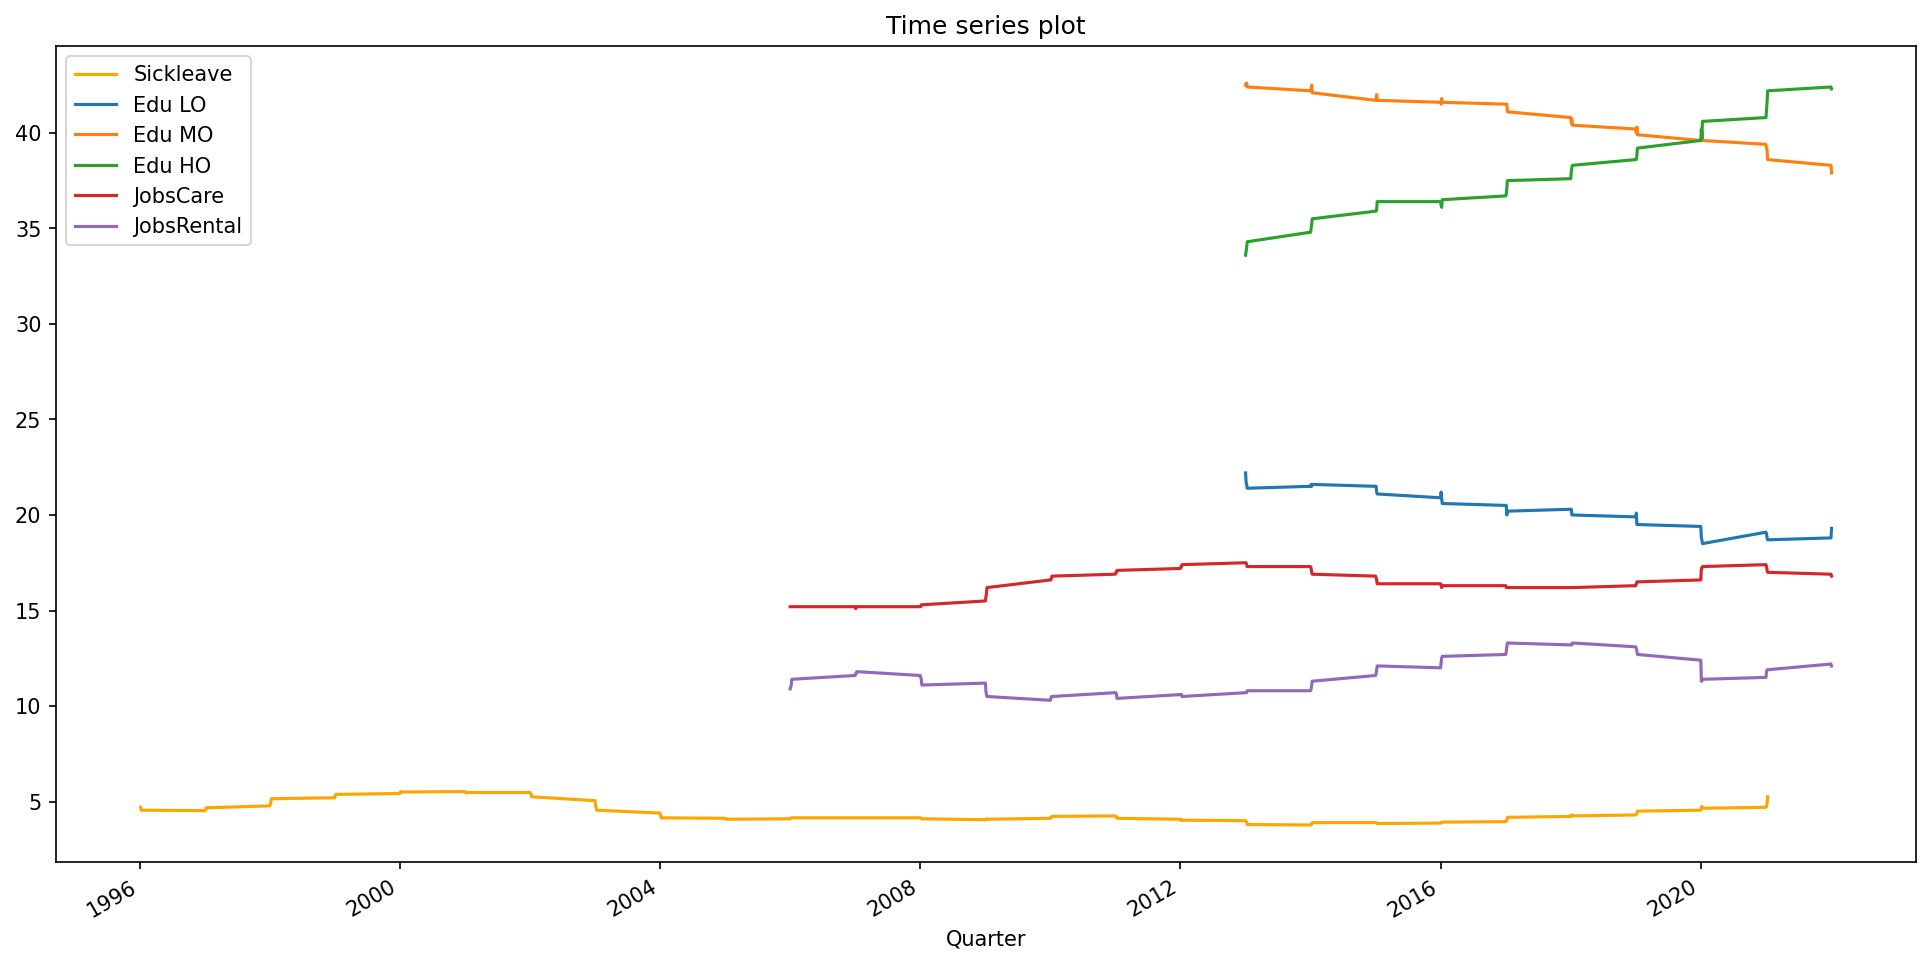

In [44]:

# code
# Visualizing sickleave and other variables
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot variables.
# in plot method we set the label and color of the curve.
df1_trend['SLtrend'].plot(label='Sickleave', c='orange')
df_1['LO_ratio'].plot(label='Edu LO')
df_1['MO_ratio'].plot(label='Edu MO')
df_1['HO_ratio'].plot(label='Edu HO')
df_1['Jobs_healthcare_ratio'].plot(label='JobsCare')
df_1['Jobs_rental_ratio'].plot(label='JobsRental')
# df_1['SizeUnder100_ratio'].plot(label='Company<100')
  
# adding title to the plot
plt.title('Time series plot')
  
# adding Label to the x-axis
plt.xlabel('Quarter')
  
# adding legend to the curve
plt.legend()

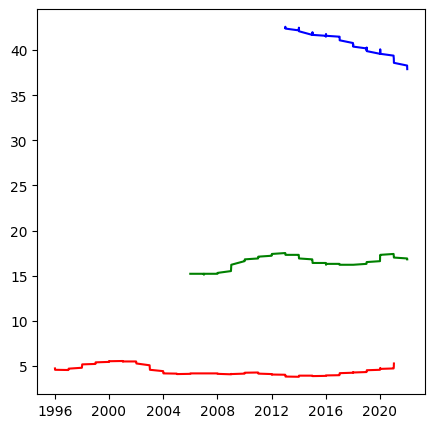

In [76]:
plt.plot(df1_trend['SLtrend'], c= 'red')
plt.plot(df1_trend['Jobs_healthcare_ratio'], c= 'green')
plt.plot(df1_trend['MO_ratio'], c= 'blue')

In [46]:
health = pd.DataFrame(cbsodata.get_data('37852'))

In [47]:
health1 = health.copy()

In [48]:
health['Perioden'] = pd.to_datetime(health['Perioden'], format='%Y%')
health = health.set_index('Perioden')

In [49]:
health

,ID,BevolkingOp1Januari_1,Levendgeborenen_2,Overledenen_3,PersonenMetZeerGoedeGezondheid_4,PersonenMetVolledigKunstgebit_5,Bof_6,Buiktyfus_7,Difterie_8,HepatitisA_9,...,ZiektenVanDeSpijsverteringsorganen_137,TotaalZktnUrinewegenGeslachtsorganen_138,NierontstekingAandAanNierbuisjes_139,ComplicatiesZwangerschapBevallin_140,AangeborenAfwijkingen_141,TotaalUitwendigeDoodsoorzaken_142,Vervoersongevallen_143,AccidenteleVal_144,AccidenteleVerdrinking_145,Zelfdoding_146
Perioden,,,,,,,,,,,,,,,,,,,,,
1900-01-01,0,5104.0,163.0,92.0,NaN,NaN,NaN,2900.0,NaN,NaN,...,NaN,66.0,NaN,9.0,NaN,39.0,NaN,NaN,NaN,NaN
1901-01-01,1,5163.0,168.0,90.0,NaN,NaN,NaN,2777.0,NaN,NaN,...,NaN,NaN,49.2,8.0,NaN,38.0,NaN,NaN,NaN,5.8
1902-01-01,2,5233.0,169.0,86.0,NaN,NaN,NaN,2314.0,NaN,NaN,...,NaN,NaN,45.5,8.0,NaN,36.0,NaN,NaN,NaN,6.1
1903-01-01,3,5307.0,170.0,84.0,NaN,NaN,NaN,2880.0,3583.0,NaN,...,202.0,52.0,43.5,8.0,22.0,39.0,NaN,NaN,17.0,6.5
1904-01-01,4,5384.0,171.0,87.0,NaN,NaN,NaN,3059.0,3748.0,NaN,...,210.7,53.0,45.0,8.0,15.0,38.0,NaN,NaN,15.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,118,17181.0,169.0,153.0,78.3,NaN,73.0,20.0,1.0,188.0,...,27.4,19.5,0.1,0.0,2.9,50.1,4.0,26.9,0.6,10.6
2019-01-01,119,17282.0,170.0,152.0,78.7,NaN,131.0,28.0,1.0,162.0,...,27.0,19.3,0.2,0.1,2.9,50.0,3.9,27.2,0.4,10.4
2020-01-01,120,17408.0,169.0,169.0,81.5,NaN,64.0,5.0,3.0,49.0,...,28.0,18.6,0.1,0.0,2.5,51.8,3.6,30.0,0.6,10.5


In [50]:
yearly_sickleave = health[['Ziekteverzuimpercentage_25']]
yearly_sickleave = yearly_sickleave.dropna()

In [51]:
yearly_sickleave

,Ziekteverzuimpercentage_25
Perioden,
1952-01-01,3.9
1953-01-01,4.1
1954-01-01,4.1
1955-01-01,4.7
1956-01-01,4.7
...,...
2017-01-01,4.0
2018-01-01,4.3
2019-01-01,4.4


In [52]:
yearly_sickleave.describe()

,Ziekteverzuimpercentage_25
count,69.000000
mean,5.901449
std,1.766809
min,3.800000
25%,4.300000
50%,5.400000
75%,6.900000
max,10.000000


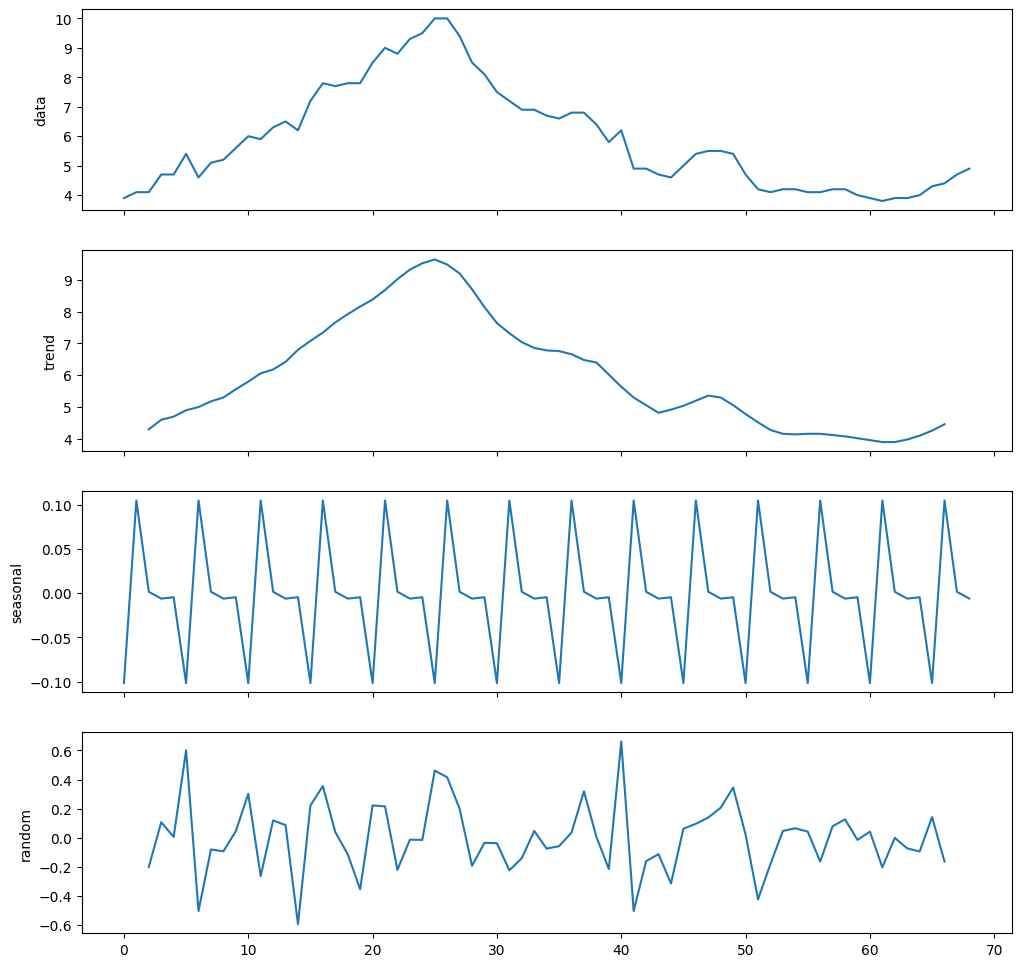

In [53]:
# note pmdarima expects nd.array as input
#decompose sickleave
arima_yearlysl = arima.decompose(yearly_sickleave.Ziekteverzuimpercentage_25.values, type_='additive', m=5) 
utils.decomposed_plot(arima_yearlysl, figure_kwargs={'figsize': (12,12)})

In [54]:
# Fit auto_arima function to yearly sickleave dataset
y_stepwise_fit = auto_arima(yearly_sickleave.Ziekteverzuimpercentage_25.values, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 5,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
y_stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=105.500, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=88.170, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=80.349, Time=0.30 sec
 ARIMA(0,1,1)(0,1,0)[5]             : AIC=106.353, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=82.317, Time=0.73 sec
 ARIMA(0,1,1)(0,1,2)[5]             : AIC=82.327, Time=0.51 sec
 ARIMA(0,1,1)(1,1,0)[5]             : AIC=88.215, Time=0.29 sec
 ARIMA(0,1,1)(1,1,2)[5]             : AIC=83.641, Time=1.08 sec
 ARIMA(0,1,0)(0,1,1)[5]             : AIC=79.835, Time=0.29 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=81.827, Time=0.40 sec
 ARIMA(0,1,0)(0,1,2)[5]             : AIC=81.831, Time=0.32 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=86.312, Time=0.10 sec
 ARIMA(0,1,0)(1,1,2)[5]             : AIC=82.679, Time=0.80 sec
 ARIMA(1,1,0)(0,1,1)[5]             : AIC=79.560, Time=0.33 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   69
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 5)   Log Likelihood                 -34.681
Date:                             Fri, 04 Nov 2022   AIC                             77.361
Time:                                     12:44:46   BIC                             85.934
Sample:                                          0   HQIC                            80.733
                                              - 69                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1511      0.133      1.135      0.256      -0.110       0.412
ar.L2          0.2553      0.123      2.077      0.038       0.014       0.496
ma.S.L5       -0.8786      0.200     -4.384      0.000      -1.271      -0.486
sigma2         0.1568      0.029      5.332      0.000       0.099       0.214
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.82   Prob(JB):                         0.01
Heteroskedasticity (H):               0.56   Skew:                            -0.82
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
y_model = SARIMAX(yearly_sickleave.Ziekteverzuimpercentage_25.values, 
                # ARIMA(2,1,0)(0,1,1)[5] 
                order = (2, 1, 0), 
                seasonal_order =(0, 1, 1, 5))
  
y_result = y_model.fit()
y_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60421D-01    |proj g|=  5.92523D-01

At iterate    5    f=  5.12797D-01    |proj g|=  1.86972D-01
 This problem is unconstrained.

At iterate   10    f=  5.02677D-01    |proj g|=  1.34516D-02

At iterate   15    f=  5.02617D-01    |proj g|=  1.59737D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   1.005D-04   5.026D-01
  F =  0.50261664846632848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FA

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   69
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 5)   Log Likelihood                 -34.681
Date:                             Fri, 04 Nov 2022   AIC                             77.361
Time:                                     12:44:47   BIC                             85.934
Sample:                                          0   HQIC                            80.733
                                              - 69                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1511      0.133      1.135      0.256      -0.110       0.412
ar.L2          0.2553      0.123      2.077      0.038       0.014       0.496
ma.S.L5       -0.8786      0.200     -4.384      0.000      -1.271      -0.486
sigma2         0.1568      0.029      5.332      0.000       0.099       0.214
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.82   Prob(JB):                         0.01
Heteroskedasticity (H):               0.56   Skew:                            -0.82
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
# Compute correlation using corr() for global health data 
health_correlation = health.corr()
# print("Correlation of sickleave trend and jobs edu ratio: ", correlation)

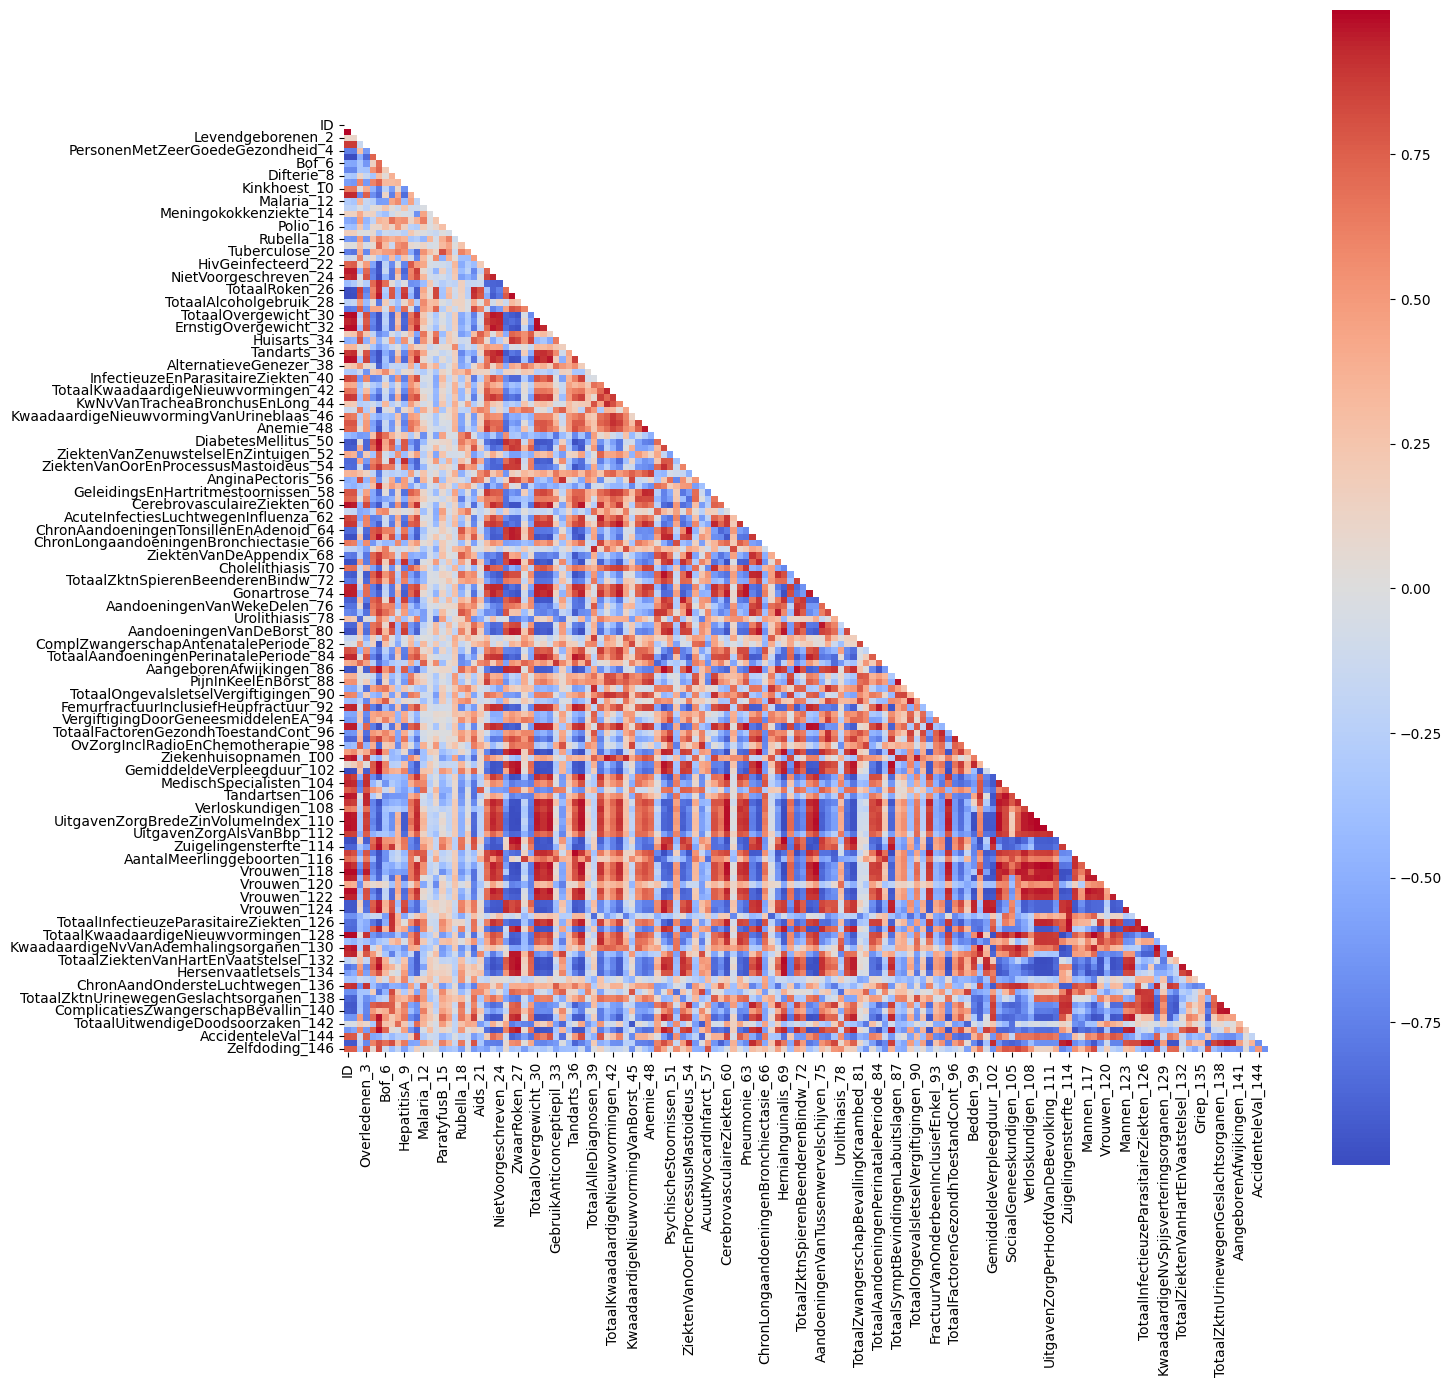

In [57]:
plt.rcParams['figure.figsize'] = (15, 15)

matrix = np.triu(health_correlation)

sns.heatmap(health_correlation, square=True, cmap= 'coolwarm', mask = matrix);

In [58]:
health_correlation

,ID,BevolkingOp1Januari_1,Levendgeborenen_2,Overledenen_3,PersonenMetZeerGoedeGezondheid_4,PersonenMetVolledigKunstgebit_5,Bof_6,Buiktyfus_7,Difterie_8,HepatitisA_9,...,ZiektenVanDeSpijsverteringsorganen_137,TotaalZktnUrinewegenGeslachtsorganen_138,NierontstekingAandAanNierbuisjes_139,ComplicatiesZwangerschapBevallin_140,AangeborenAfwijkingen_141,TotaalUitwendigeDoodsoorzaken_142,Vervoersongevallen_143,AccidenteleVal_144,AccidenteleVerdrinking_145,Zelfdoding_146
ID,1.000000,0.996593,0.104745,0.877902,-0.755393,-0.993852,-0.535605,-0.713127,-0.309879,-0.604394,...,-0.680289,-0.873227,-0.925999,-0.914706,-0.642568,-0.038970,-0.643768,0.780055,-0.931230,0.758882
BevolkingOp1Januari_1,0.996593,1.000000,0.110574,0.877218,-0.768033,-0.995991,-0.545491,-0.716306,-0.336319,-0.635728,...,-0.677883,-0.896699,-0.935863,-0.932319,-0.649672,-0.051081,-0.559116,0.769025,-0.939707,0.760795
Levendgeborenen_2,0.104745,0.110574,1.000000,-0.147956,0.281628,-0.503923,-0.335290,-0.336831,0.118505,0.598316,...,-0.352388,-0.351592,-0.367184,-0.344558,0.485543,0.188260,0.586931,-0.153441,-0.228486,-0.342737
Overledenen_3,0.877902,0.877218,-0.147956,1.000000,-0.621014,-0.862919,-0.632552,-0.350989,-0.161668,-0.624563,...,-0.355328,-0.678884,-0.730536,-0.727270,-0.748019,0.099101,-0.619668,0.751509,-0.711175,0.783415
PersonenMetZeerGoedeGezondheid_4,-0.755393,-0.768033,0.281628,-0.621014,1.000000,0.732303,0.144090,0.538226,-0.346845,0.598979,...,0.188098,-0.561428,0.751999,0.502126,0.704963,-0.322366,0.731765,-0.558527,0.608375,0.074820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TotaalUitwendigeDoodsoorzaken_142,-0.038970,-0.051081,0.188260,0.099101,-0.322366,0.897082,0.273380,0.225823,0.702787,0.239876,...,0.059150,0.078961,-0.061026,0.017307,0.317779,1.000000,0.175678,0.009313,0.075335,0.023305
Vervoersongevallen_143,-0.643768,-0.559116,0.586931,-0.619668,0.731765,0.979476,0.720099,0.049312,-0.043659,0.469864,...,-0.142135,-0.089314,0.361825,0.068150,0.548833,0.175678,1.000000,-0.190621,0.355613,-0.548420
AccidenteleVal_144,0.780055,0.769025,-0.153441,0.751509,-0.558527,-0.507089,-0.241189,-0.421898,-0.267221,-0.293147,...,-0.515503,-0.621910,-0.672585,-0.685285,-0.548694,0.009313,-0.190621,1.000000,-0.677717,0.507156
AccidenteleVerdrinking_145,-0.931230,-0.939707,-0.228486,-0.711175,0.608375,0.798403,0.685262,0.813711,0.332851,0.643701,...,0.837930,0.909794,0.954287,0.928131,0.463921,0.075335,0.355613,-0.677717,1.000000,-0.669564


In [59]:
sickleaveQ = health1[['Perioden','Ziekteverzuimpercentage_25']]
sickleaveQ = sickleaveQ.dropna()

In [60]:
sickleaveQ

,Perioden,Ziekteverzuimpercentage_25
52,1952,3.9
53,1953,4.1
54,1954,4.1
55,1955,4.7
56,1956,4.7
...,...,...
117,2017,4.0
118,2018,4.3
119,2019,4.4
120,2020,4.7


In [61]:
sickleaveQ['SLNext1'] = sickleaveQ['Ziekteverzuimpercentage_25'].shift(-1)
sickleaveQ['SLdiff'] = sickleaveQ['SLNext1'] - sickleaveQ['Ziekteverzuimpercentage_25']
sickleaveQ['SLdiffQ'] = sickleaveQ['SLdiff']/4
sickleaveQ['SL_Q1'] = sickleaveQ['Ziekteverzuimpercentage_25']
sickleaveQ['SL_Q2'] = sickleaveQ['Ziekteverzuimpercentage_25'] + sickleaveQ['SLdiffQ']
sickleaveQ['SL_Q3'] = sickleaveQ['Ziekteverzuimpercentage_25'] + 2*sickleaveQ['SLdiffQ']
sickleaveQ['SL_Q4'] = sickleaveQ['Ziekteverzuimpercentage_25'] + 3*sickleaveQ['SLdiffQ']

In [68]:
sickleave_q = sickleaveQ.copy()
sickleave_q = sickleave_q[['Perioden', 'SL_Q1', 'SL_Q2', 'SL_Q3', 'SL_Q4']]
sickleave_q = sickleave_q.rename(columns={'SL_Q1' : '0101', 
                'SL_Q2': '0401', 
                'SL_Q3': '0701', 
                'SL_Q4': '1001'})
sickleave_q = (sickleave_q.melt(id_vars='Perioden', var_name='Dates',value_name='SickleaveQPCT')
       .sort_values('Perioden')
       #.reset_index(drop=True)
       )


In [72]:
sickleave_q['Period'] = sickleave_q['Perioden'] + sickleave_q['Dates']
sickleave_q['Period'] = pd.to_datetime(sickleave_q['Period'], format='%Y%m%d')
sickleave_q.sort_values('Period').reset_index()


,index,Perioden,Dates,SickleaveQPCT,Period
0,0,1952,0101,3.90,1952-01-01
1,69,1952,0401,3.95,1952-04-01
2,138,1952,0701,4.00,1952-07-01
3,207,1952,1001,4.05,1952-10-01
4,1,1953,0101,4.10,1953-01-01
...,...,...,...,...,...
271,274,2020,1001,4.85,2020-10-01
272,68,2021,0101,4.90,2021-01-01
273,137,2021,0401,NaN,2021-04-01
274,206,2021,0701,NaN,2021-07-01


In [77]:
new_sickleaveQ = sickleave_q[['Period', 'SickleaveQPCT' ]]
new_sickleaveQ = new_sickleaveQ.set_index('Period')
new_sickleaveQ

,SickleaveQPCT
Period,
1952-01-01,3.90
1952-07-01,4.00
1952-04-01,3.95
1952-10-01,4.05
1953-10-01,4.10
...,...
2020-01-01,4.70
2021-04-01,NaN
2021-01-01,4.90


In [93]:
new_sickleave1996 = sickleave_q[['Period', 'SickleaveQPCT' ]]
new_sickleave1996 = new_sickleave1996[new_sickleave1996['Period'] >= '1996-01-01 00:00:00']
new_sickleave1996 = new_sickleave1996.set_index('Period').sort_index()
new_sickleave1996

,SickleaveQPCT
Period,
1996-01-01,4.700
1996-04-01,4.675
1996-07-01,4.650
1996-10-01,4.625
1997-01-01,4.600
...,...
2020-10-01,4.850
2021-01-01,4.900
2021-04-01,NaN


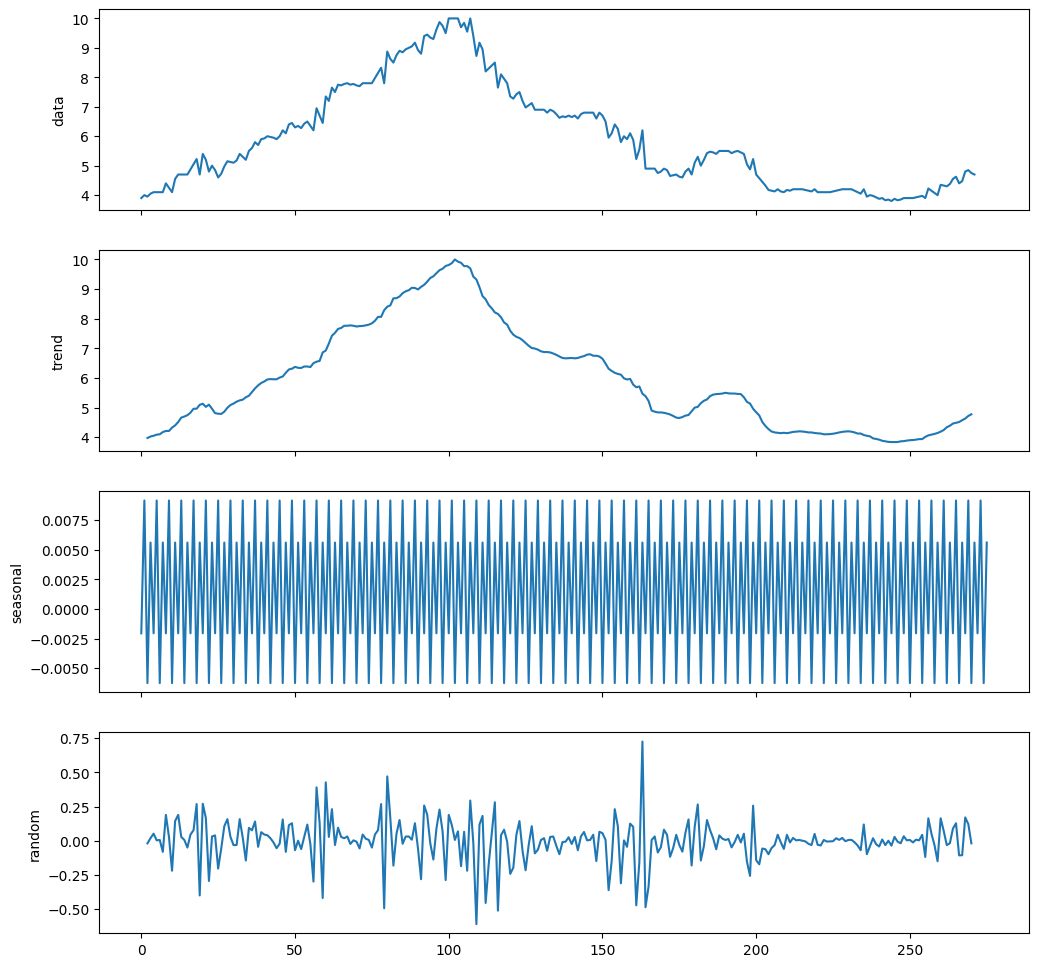

In [80]:
# pmdarima decompose for new sickleave 1952
arima_sickleave1952 = arima.decompose(new_sickleaveQ.SickleaveQPCT.values, type_='additive', m=4) 
utils.decomposed_plot(arima_sickleave1952, figure_kwargs={'figsize': (12,12)})

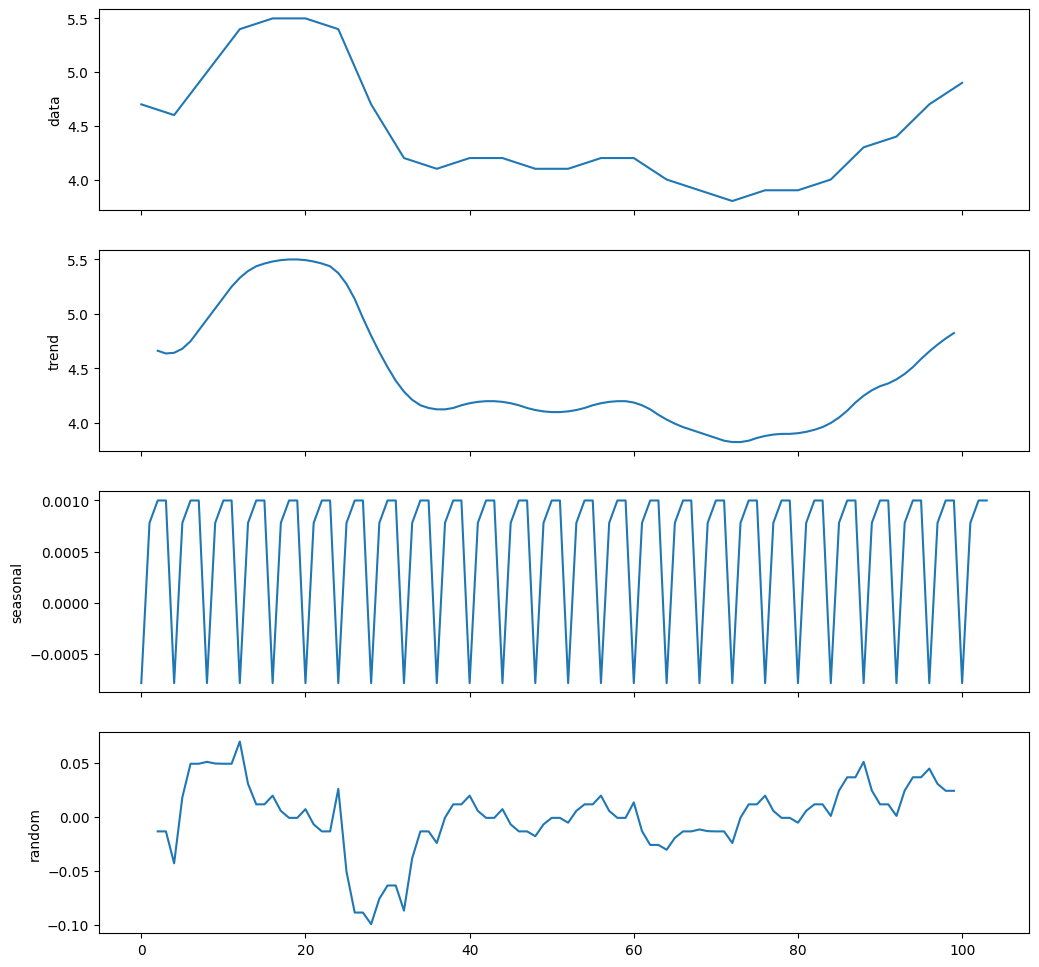

In [94]:
# pmdarima decompose for new sickleave 1996
arima_sickleave1996 = arima.decompose(new_sickleave1996.SickleaveQPCT.values, type_='additive', m=4) 
utils.decomposed_plot(arima_sickleave1996, figure_kwargs={'figsize': (12,12)})

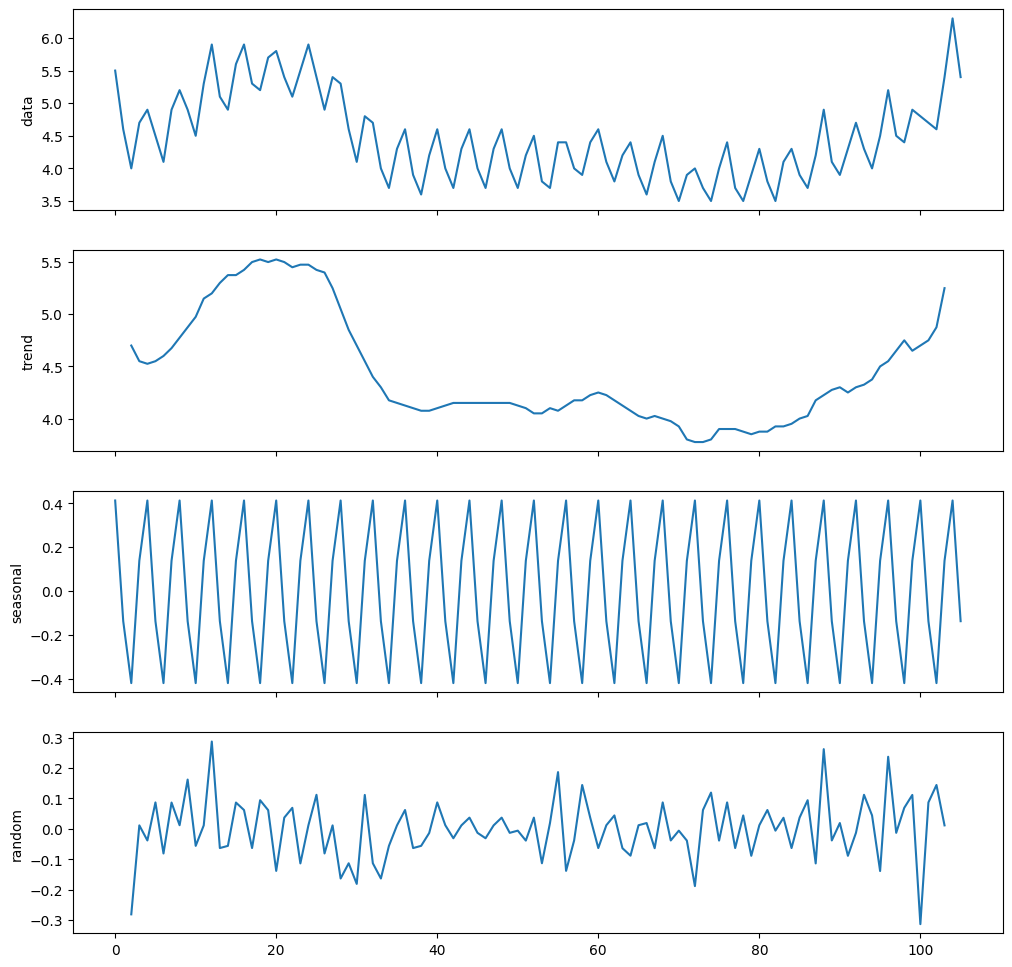

In [95]:
utils.decomposed_plot(arima_decomp, figure_kwargs={'figsize': (12,12)})

In [98]:
new_sl_trend = pd.DataFrame(arima_sickleave1996.trend, columns=['NewSLtrend'] ,  index=new_sickleave1996.index)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=42cb1c85-0f0c-4f0e-8a87-9969dbe05ce0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>